In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('framingham.csv')
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
# Separate features and target variable
X = data.drop(columns=['TenYearCHD'])  # Features
y = data['TenYearCHD']  # Target variable

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [7]:
# Logistic Regression Model with imputed data
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_imputed, y_train)
logistic_predictions = logistic_model.predict(X_test_imputed)

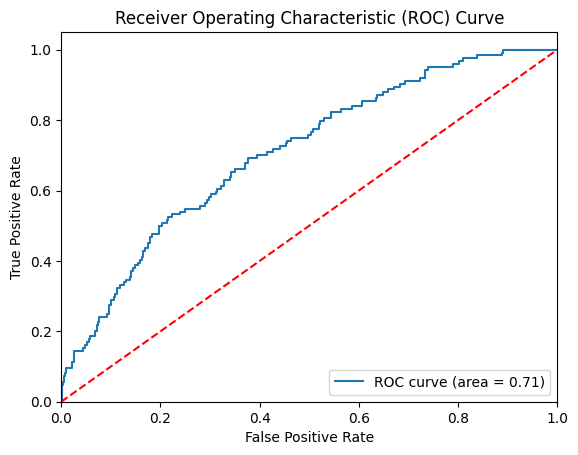

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities
y_pred_proba = logistic_model.predict_proba(X_test_imputed)[::,1]

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')  # Random prediction line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

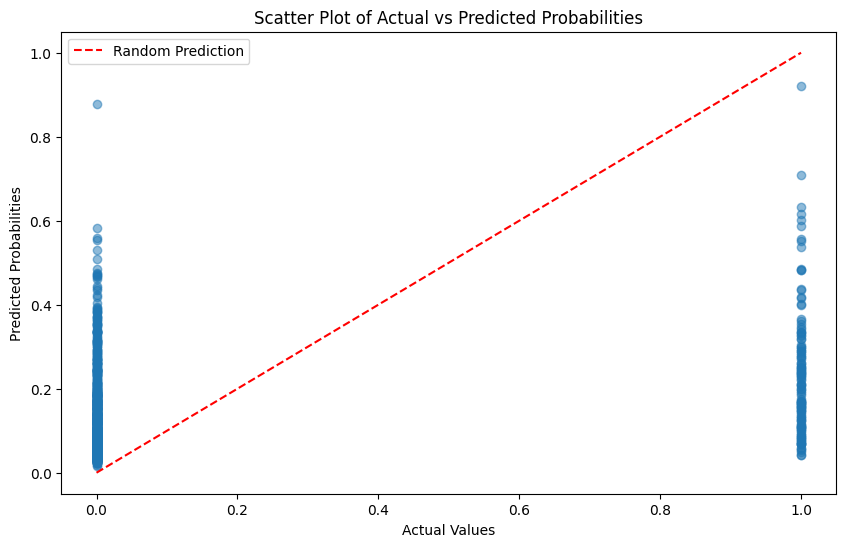

In [9]:
# Scatter plot of actual vs predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Random Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.title('Scatter Plot of Actual vs Predicted Probabilities')
plt.legend()
plt.show()

In [10]:
# Evaluation
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

In [11]:
print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)

Logistic Regression Metrics:
Accuracy: 0.8573113207547169
Precision: 0.6
Recall: 0.07258064516129033
F1 Score: 0.12949640287769784


In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
# Decision Tree Model with imputed data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_imputed, y_train)
tree_predictions = tree_model.predict(X_test_imputed)

In [14]:
# Evaluation
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions)
tree_recall = recall_score(y_test, tree_predictions)
tree_f1 = f1_score(y_test, tree_predictions)

In [18]:
print("\nDecision Tree Metrics:")
print("Accuracy:", tree_accuracy)
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)


Decision Tree Metrics:
Accuracy: 0.7653301886792453
Precision: 0.22627737226277372
Recall: 0.25
F1 Score: 0.23754789272030652


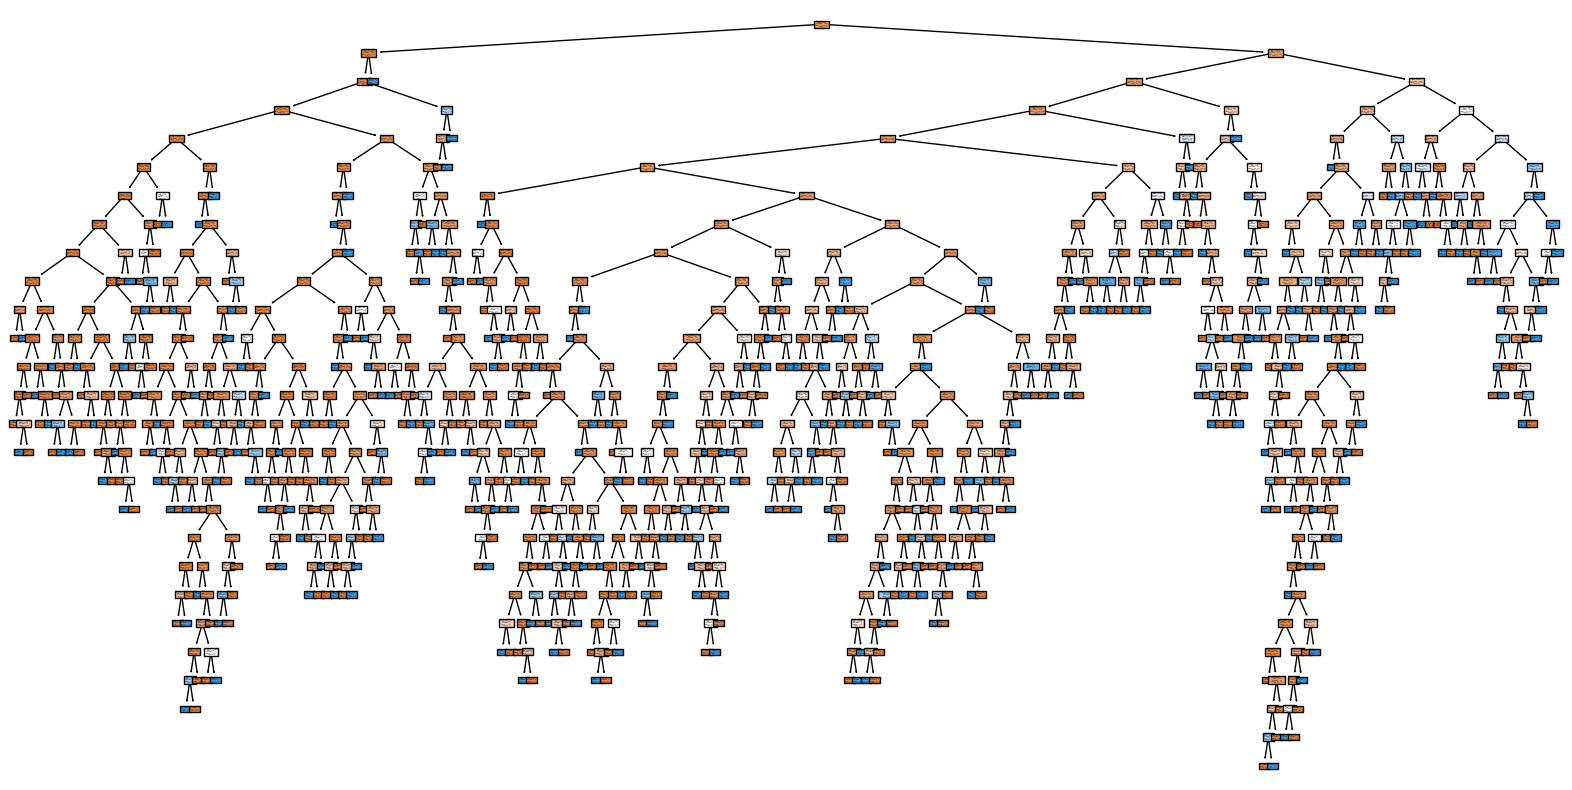

In [17]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [3]:
# Decision Tree Model with pruned tree
pruned_tree_model = DecisionTreeClassifier(max_depth=3)
pruned_tree_model.fit(X_train_imputed, y_train)

# Plot pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_tree_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

In [4]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions, display_labels=['0', '1'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

NameError: name 'plt' is not defined